<a href="https://colab.research.google.com/github/katelyn-yim/csce489/blob/main/csce489_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCE 489 - Data Analytics for Cybersecurity


A special topics class taught by Dr. Martin Carlisle introducing methods of data analytics for cybersecurity.

## Homework 2 (75 pts)

In this homework, I have been tasked to analyze an intrusion dataset, intrusion.csv using different machine learning Python Libraries. The intrusion dataset contains 3 attributes that when plotted demonstrates they are separable from each other. The final column of the dataset is the intrusion column, that has a binary data type where 1 means that the entry is an intrusion.

### Loading Intrusion Dataset

As previously discussed in Homework 1, Pandas is a convenient Python library that can quickly import data into a DataFrame object. The Pandas DataFrame data type allows for easy organization of the data. Another feature of the Pandas library is that since it is built on top of the Numpy and matplotlib libraries I am able to easily plot and manipulate the data in the DataFrame object.

In [1]:
import pandas as pd

Using Pandas I am able to easily load the intrusion.csv data with a built in function called run_csv. Since the data came from canvas there was really no way to import using a link originally, as a result I uploaded the csv to my personal github. Once on my github I am able to easily download the csv in this notebook without needing to do so locally.

In [2]:
intrusion_dwnld_lnk = "https://raw.githubusercontent.com/katelyn-yim/csce489/main/intrusion.csv"
intrusion_df = pd.read_csv(intrusion_dwnld_lnk, sep=',', engine='python')

### Plotting

To demonstrate that the three attributes are separable, I will use the built in scatter plot function from Pandas to plot Attribute 1 vs Attribute 2 and Attribute 2 vs Attribute 3 where intrusions are colored differently. 

Intrusion distinguishing and properly requires additional Python Libraries so that I can create an array to identify which color a plot point should be. I will be importing numpy matplotlib to display the plot in the output terminal.

In [3]:
import matplotlib.pyplot as plt

The built in scatter plot function of the Pandas library allows me to set which column value determines the color of the point by setting the 'c' parameter to the Intrusion column. A color scale can be seen to the side but since the Intrusion attribute can only be 1's or 0's the  color of the points will either be blue or red. Where red indicates an intrusion and blue is normal activity.

**Attribute 2 vs. Attribute 1 Plot**

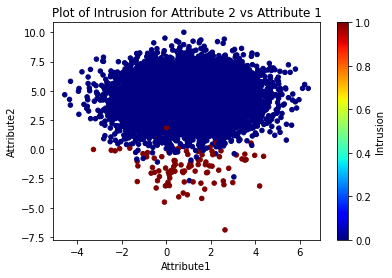

In [4]:
intrusion_df.plot.scatter('Attribute1', 'Attribute2', 
                          c='Intrusion', cmap='jet', sharex=False)
plt.xlabel('Attribute1')
plt.title('Plot of Intrusion for Attribute 2 vs Attribute 1')
plt.show()

**Attribute 3 vs. Attribute 2**

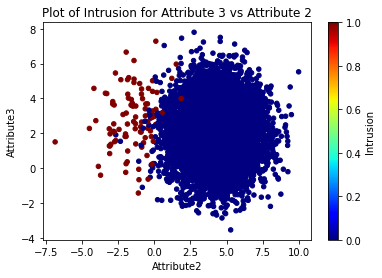

In [5]:
intrusion_df.plot.scatter('Attribute2', 'Attribute3', 
                          c='Intrusion', cmap='jet', sharex=False)
plt.title('Plot of Intrusion for Attribute 3 vs Attribute 2')
plt.show()

From both graphs we are able to see that the intrusion dataset, the red points, are distinctly separate from the normal activity. With the intrusion points having very little overlap with the non-intrusion values.

### Training & Testing Data Separation

I will be using sklearn to split the intrusion data into training and testing sets.

In [6]:
from sklearn.model_selection import train_test_split

The intrusion column is the label that we will be predicting in the training and testing datasets so it will be the y value that we are using for the train_test_split. Therefore attributes 1-3 are the x-values features being used to predict if a data point is an intrusion or not.

In [7]:
y = intrusion_df.Intrusion
x = intrusion_df.drop('Intrusion', axis=1)

With the dataset properly separated into x and y values for the train_test_split we are now able to split the data into testing and training data. I decided to start the testing data as 20% of the original dataset with the rest being training data. I also chose the random state to be 42 so that the training and testing dataset stays the same across executions.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state=42)

### Support Vector Classifier (SVC)

For the support vector classifier (SVC) section I will be creating and training three different kernels; polynomial, linear, and RBF. After training the testing model, we can see the confusion matrix with sklearn's metrics. The matrix displays that the true and false positives and negatives predicted by the SVC Linear model.

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

I created a for-loop with all the required kernels placed in an array called 'kernels'. The for-loop with go through train and test a model and then output the confusion matrix and classification report.

In [65]:
kernels = ['poly', 'linear', 'rbf']
for kernel in kernels: 
  model = SVC(kernel=kernel)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  confused = confusion_matrix(y_test,y_pred)
  print("-"*25, kernel, "-"*25)
  print("Confusion Matrix")
  print(confused)
  print("\t\tTrue Positives (Normal Activity): {0}"
  .format(confused[0][0]))
  print("\t\tFalse Positives (Intrusions Detected as Normal Activity): {0}"
  .format(confused[0][1]))
  print("\t\tFalse Negatives (Normal Activity Detected as Intrusions): {0}"
  .format(confused[1][0]))
  print("\t\tTrue Negatives (Intrusions): {0}"
  .format(confused[1][1]))
  print("Classification Report")
  print(classification_report(y_test, y_pred))
  print("-"*60)

------------------------- poly -------------------------
Confusion Matrix
[[2003    0]
 [   2   15]]
		True Positives (Normal Activity): 2003
		False Positives (Intrusions Detected as Normal Activity): 0
		False Negatives (Normal Activity Detected as Intrusions): 2
		True Negatives (Intrusions): 15
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       1.00      0.88      0.94        17

    accuracy                           1.00      2020
   macro avg       1.00      0.94      0.97      2020
weighted avg       1.00      1.00      1.00      2020

------------------------------------------------------------
------------------------- linear -------------------------
Confusion Matrix
[[2002    1]
 [   1   16]]
		True Positives (Normal Activity): 2002
		False Positives (Intrusions Detected as Normal Activity): 1
		False Negatives (Normal Activity Detected as Intrusions): 1
		True Negatives (Intr

### Random Forest Classifier

Now that I have trained and tested three SVC kernels, I can now move onto the Random Forest Classifier. Random Forest Classifier is a module that can be imported from sklearn. The training and testing datasets will be exactly the same as those used in the SVC section of the homework.

In [42]:
from sklearn.ensemble import RandomForestClassifier

In the RandomForestClassifier module you have to decide the number of n_estimators which is the number of trees used in predictions. The standard number of n_estimators is 100, I decided to start with the default number of n_estimators and then raise the values to see the difference.

In [70]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

The confusion matrix and the classification report for the Random Forest Classifier is printed out in the same format of the SVC section.

In [71]:
print("Confusion Matrix")
print(confused)
print("\t\tTrue Positives (Normal Activity): {0}"
.format(confused[0][0]))
print("\t\tFalse Positives (Intrusions Detected as Normal Activity): {0}"
.format(confused[0][1]))
print("\t\tFalse Negatives (Normal Activity Detected as Intrusions): {0}"
.format(confused[1][0]))
print("\t\tTrue Negatives (Intrusions): {0}"
.format(confused[1][1]))
print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix
[[2002    1]
 [   3   14]]
		True Positives (Normal Activity): 2002
		False Positives (Intrusions Detected as Normal Activity): 1
		False Negatives (Normal Activity Detected as Intrusions): 3
		True Negatives (Intrusions): 14
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2003
           1       0.89      0.94      0.91        17

    accuracy                           1.00      2020
   macro avg       0.94      0.97      0.96      2020
weighted avg       1.00      1.00      1.00      2020



Once testing with the default number of n_estimators I then went to 1000 n_estimators. The change in n_estimators did not change the output of the confusion matrix but did increase in the classification report statistics across the board. A drawback of increasing the number of n_estimators is that the runtime becomes noticeably longer for training and testing the RandomForest Classifier.